In [123]:
!pip install je
!pip install gensim

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [124]:
import jieba
import re
import numpy as np
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
import matplotlib

## 分词

In [125]:
# spm_train分词更合适
# f=open('../../hlm.txt',"r",encoding='utf-8')
f=open('../../sgyy.txt',"r",encoding='utf-8')
lines=[]
# 删除特殊字符 
r = "[_.!+-=——,$%^，。？、~@#￥%……&*《》<>「」{}【】()/\'\"\n\u3000 ]"
# sentence = re.sub(r, ' ', sentence)

for line in f:
    temp=jieba.lcut(line)
    words=[]
    for i in temp:
        i=re.sub(r,"",i)
        if len(i)>0:
            words.append(i)
    if len(words)>0:
        lines.append(words)

f.close()

print(lines[0:20])



[['内容简介'], ['三国演义', '由', '东汉', '末年', '黄巾起义', '末期', '开始', '描写', '至', '西晋', '初期', '国家', '重归', '统一', '结束', '以魏', '蜀', '吴', '三个', '政治', '军事', '集团', '之间', '的', '形成', '演变', '矛盾', '斗争', '为主', '线', '最后', '由晋', '统一', '全国', '国家', '重归', '统一', '小说', '在', '广阔', '的', '社会', '历史背景', '上', '展示', '出', '那个', '时代', '尖锐', '复杂', '又', '极具', '特色', '的', '政治', '军事冲突', '在', '军事', '政治谋略', '方面', '对', '后世', '产生', '了', '极其', '深远', '的', '影响'], ['三国演义', '是', '中国', '第一部', '长篇', '章回体', '小说', '中国', '小说', '由', '短篇', '发展', '至', '长篇', '的', '原因', '与', '说书', '有关', '宋代', '讲故事', '的', '风气', '盛行', '说书', '成为', '一种', '职业', '说书人', '喜欢', '拿', '古代', '人物', '的', '故事', '作为', '题材', '来', '敷演', '而', '陈寿', '撰', '裴松之', '注', '的', '三国志', '里面', '的', '人物', '众多', '以', '多个', '主人公', '做', '线索', '事件', '纷繁', '正是', '撰写', '故事', '的', '最好', '素材', '三国', '故事', '某些', '零星', '片段', '原来', '在', '民间', '也', '已', '流传', '加上', '说书人', '长期', '取材', '内容', '越来越', '丰富', '人物形象', '越来越', '饱满', '最后', '由', '许多', '独立', '的', '故事', '逐渐', '组合而成', '长篇', '巨著', '这些', '各自', '孤立', '的', '故事

## 魔性训练

In [126]:
model = Word2Vec(lines,vector_size=20,window=2,min_count=3,epochs=16,negative=10)
print("孔明的词向量:\n",model.wv.get_vector('孔明'))
print("孔明相关的词向量:\n",model.wv.most_similar('孔明',topn=20))

孔明的词向量:
 [-0.38508332 -0.42957848  1.6060576  -0.7966016  -0.9527125  -0.18013994
  1.1323743   0.35494304 -2.5641503   0.5563241  -0.02405504 -1.3643743
  1.2459649  -1.5902772   1.1622496   0.5380329   1.3580034   2.0612104
 -2.9399245  -0.25659952]
孔明相关的词向量:
 [('关公', 0.8566865921020508), ('先主', 0.855891764163971), ('陆逊', 0.8398908972740173), ('玄德', 0.8394918441772461), ('夏侯楙', 0.8365272283554077), ('鲁肃', 0.8321064710617065), ('孙夫人', 0.8221720457077026), ('周瑜', 0.8209879398345947), ('袁术', 0.8139473795890808), ('徐庶', 0.8101704120635986), ('魏主', 0.8037357926368713), ('孙权', 0.7910827994346619), ('懿', 0.7730228304862976), ('使者', 0.7695361375808716), ('维', 0.7681445479393005), ('孙峻', 0.7678118944168091), ('孟获', 0.7673786878585815), ('楙', 0.7638509273529053), ('后主', 0.7587493062019348), ('刘璋', 0.7585680484771729)]


## 可视化

In [127]:
# 将词向量投影到二维空间
rawWordVec=[]
word2ind={}
for i,w in enumerate(model.wv.index_to_key):
    rawWordVec.append(model.wv[w])
    word2ind[w] = i
rawWordVec=np.array(rawWordVec)
# 降维2
X_reduced=PCA(n_components=2).fit_transform(rawWordVec)

In [128]:
X_reduced

array([[-3.9080625 ,  1.9281152 ],
       [-4.450408  ,  2.3129025 ],
       [-3.5761156 ,  2.348791  ],
       ...,
       [ 0.05408224, -0.44047177],
       [-0.0522329 , -0.15229768],
       [ 0.01254286, -0.5355501 ]], dtype=float32)

In [129]:
rawWordVec

array([[-0.05734272,  3.1128333 ,  0.17563787, ..., -3.3638473 ,
        -2.8977196 , -2.7945743 ],
       [ 1.9353381 ,  4.0415845 , -0.20631725, ..., -2.6514568 ,
        -1.472367  , -2.8333752 ],
       [ 0.89857554,  2.675204  ,  0.7515059 , ..., -0.8002175 ,
        -2.6663585 ,  0.2897185 ],
       ...,
       [ 0.26099443, -0.21017027, -0.09000377, ..., -0.22747618,
        -0.37599212, -0.38681126],
       [ 0.19371499, -0.10199925, -0.02578942, ..., -0.06651545,
        -0.49863824, -0.6283114 ],
       [ 0.01655763, -0.14542842, -0.07225297, ...,  0.02553072,
        -0.312871  , -0.56560165]], dtype=float32)

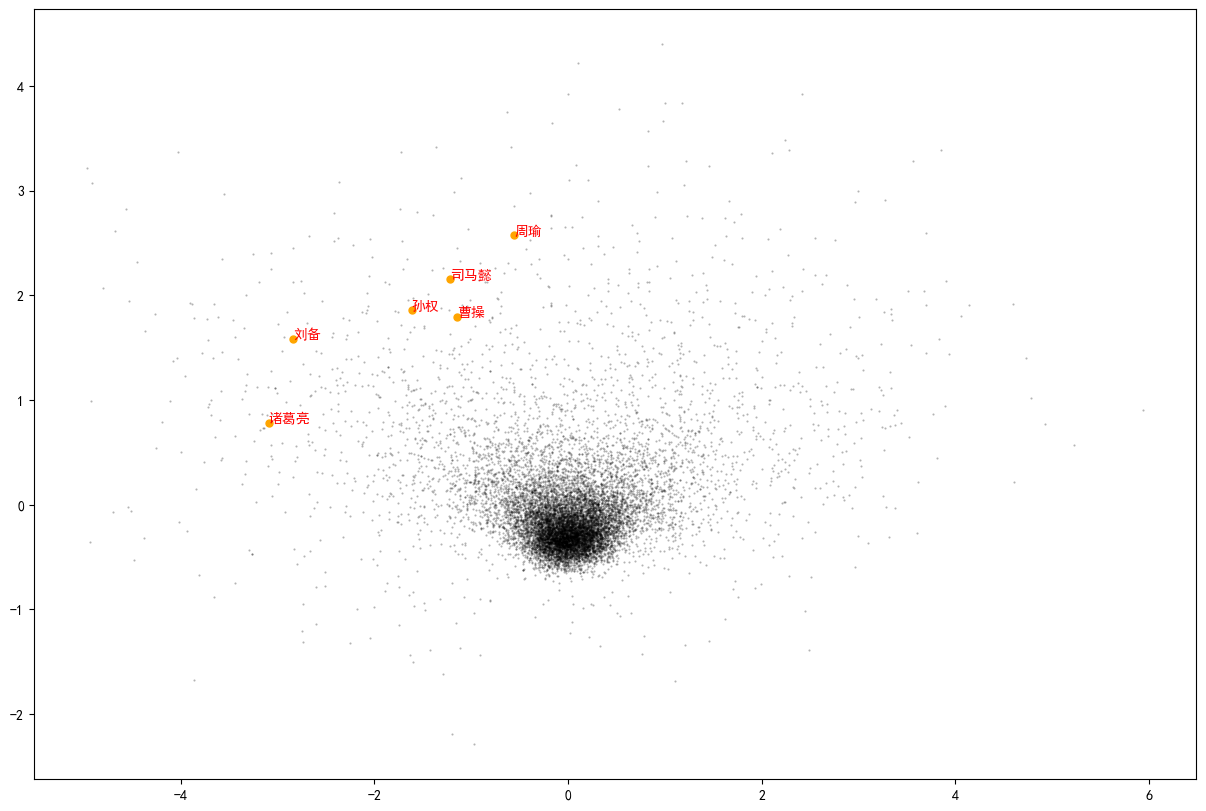

In [130]:
# 绘制星空图
# 绘制所有单词向量的三维空间投影
fig = plt.figure(figsize=(15, 10))
ax=fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:,0],X_reduced[:,1],".",markersize=1,alpha=0.3,color='black')

# words=['宝玉','香菱', '凤姐', '贾琏', '探春', '林黛玉', '晴雯','凤姐儿','袭人','史湘云', '贾村','林如海']
words=['孙权','刘备', '诸葛亮', '周瑜', '司马懿', '汉献帝', '曹操']
# 设置中文字体避免乱码
# zhfont1=matplotlib.font_manager.FontProperties(fname='/Library/Fonts/Microsoft/Fangsong.ttf',size=16)
# fontproperties=zhfont1
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0],xy[1],".",alpha=1,color='orange',markersize=10)
        plt.text(xy[0],xy[1],w,alpha=1,color='red')


## 类比试验

In [131]:
# 玄德-孔明=？-曹操
words=model.wv.most_similar(positive=['玄德','曹操'],negative=['孔明'])
words

[('司马懿', 0.836118221282959),
 ('吕布', 0.7814934849739075),
 ('胜负', 0.7708860039710999),
 ('张鲁', 0.7483898401260376),
 ('魏主', 0.7348043918609619),
 ('相', 0.7318634390830994),
 ('公孙瓒', 0.7209503054618835),
 ('袁绍', 0.7121147513389587),
 ('翼德', 0.7116872668266296),
 ('邓艾', 0.7086629867553711)]

In [122]:
# 曹操-魏=？-蜀
words=model.wv.most_similar(positive=['曹操','蜀'],negative=['魏'])
words

[('袁绍', 0.7392863631248474),
 ('吕布', 0.6891241669654846),
 ('将来', 0.6880301833152771),
 ('董卓', 0.6670030355453491),
 ('白虎', 0.6586707234382629),
 ('后魏', 0.6202218532562256),
 ('王必', 0.6161190867424011),
 ('周瑜', 0.6142142415046692),
 ('孙策', 0.6100134253501892),
 ('操军', 0.609052300453186)]